In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:**
**1. Data Exploration and Understanding:**

**• Dataset Overview:**
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [28]:
# Load the dataset
file_path = '/content/drive/MyDrive/Assignment1_Dataset/WHR-2024-5CS037.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Dataset Overview
# Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))
print()

# Identify the number of rows and columns
row=len(df.index)
print(f"Number of rows = {row}")
columns=len(df.columns)
print(f"Number of columns = {columns}")
print()

# List all columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

**• Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [29]:
# 1. Calculate the mean, median, and standard deviation for the Score column.
mean = df["score"].mean()
median = df["score"].median()
standard_deviation = df["score"].std()

print(f"Mean is : {mean}")
print(f"Median is : {median}")
print(f"SD is : {standard_deviation}")

# 2. Identify the country with the highest and lowest happiness scores.
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"\nCountry with the highest happiness score: {max_score_country}")
print(f"Country with the lowest happiness score: {min_score_country}")

Mean is : 5.52758041958042
Median is : 5.785
SD is : 1.1707165099442995

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


**• Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [30]:
# 1. Check for missing values
print("\nMissing values count per column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values count per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**• Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [31]:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]
print("the countries with a Score greater than 7.5 is : \n")
print(filtered_df)

# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
top_gdp_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("THE GDP per Capita in descending order: \n")
print(top_gdp_df)

the countries with a Score greater than 7.5 is : 

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
THE GDP per Capita in descending order: 

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881  

**• Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

  Low − (Score < 4)

  Medium − (4 ≤ Score ≤ 6)
  
  High − (Score > 6)

In [32]:
# Create Happiness Category column that categorizes countries into three categories based on their Score.
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)

print("\nDataset with the new 'Happiness Category' column:")
print(df[["score", "Happiness Category"]])


Dataset with the new 'Happiness Category' column:
     score Happiness Category
0    7.741               High
1    7.583               High
2    7.525               High
3    7.344               High
4    7.341               High
..     ...                ...
138  3.295                Low
139  3.245                Low
140  3.186                Low
141  2.707                Low
142  1.721                Low

[143 rows x 2 columns]


**2. Data Visualizations:**

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

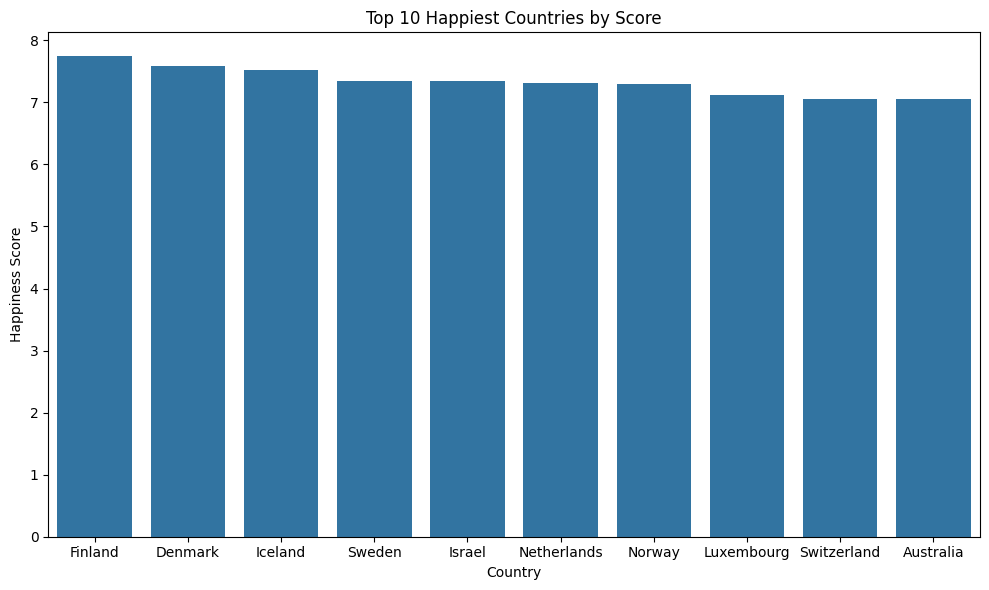

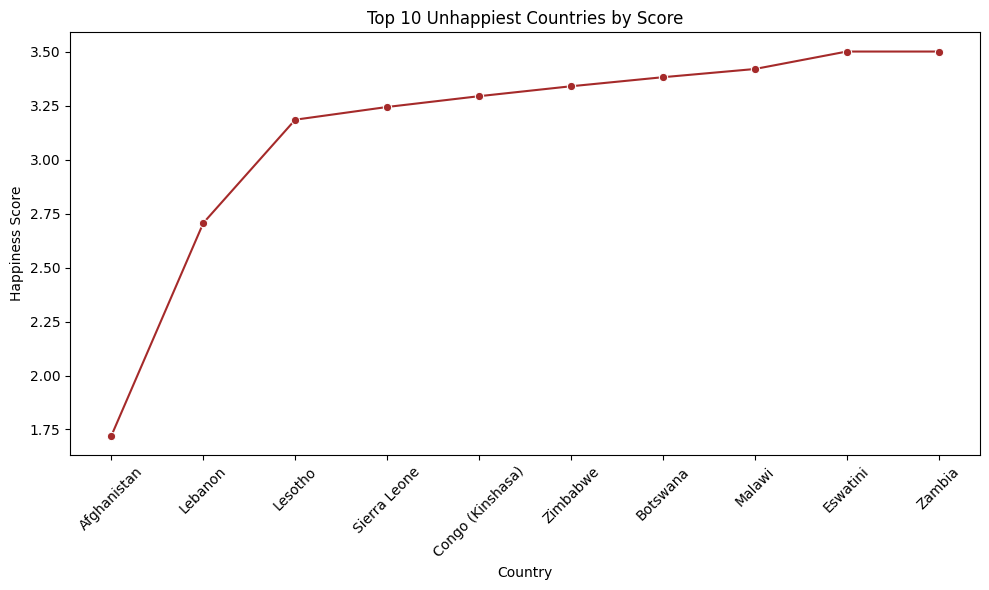

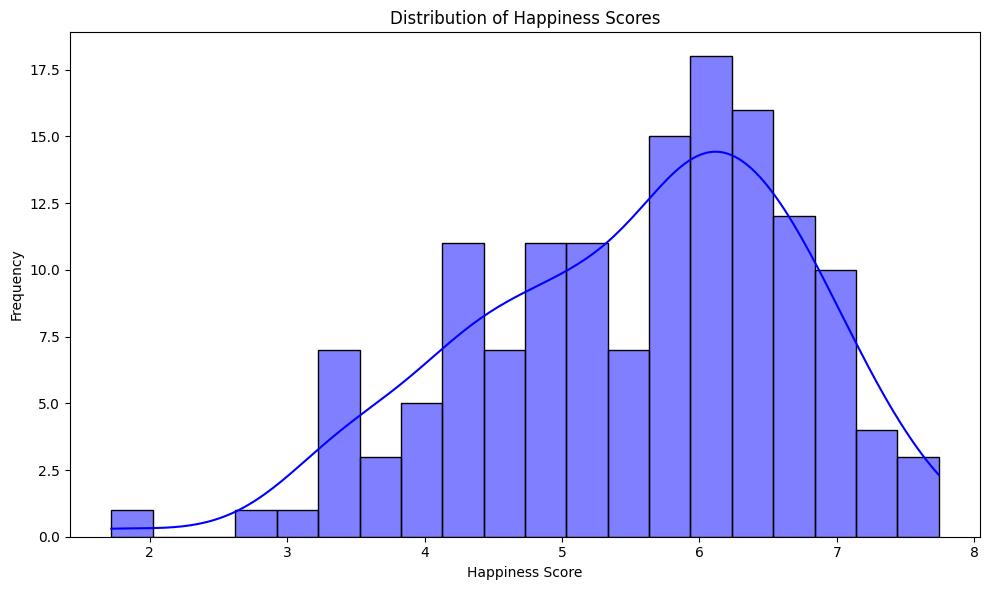

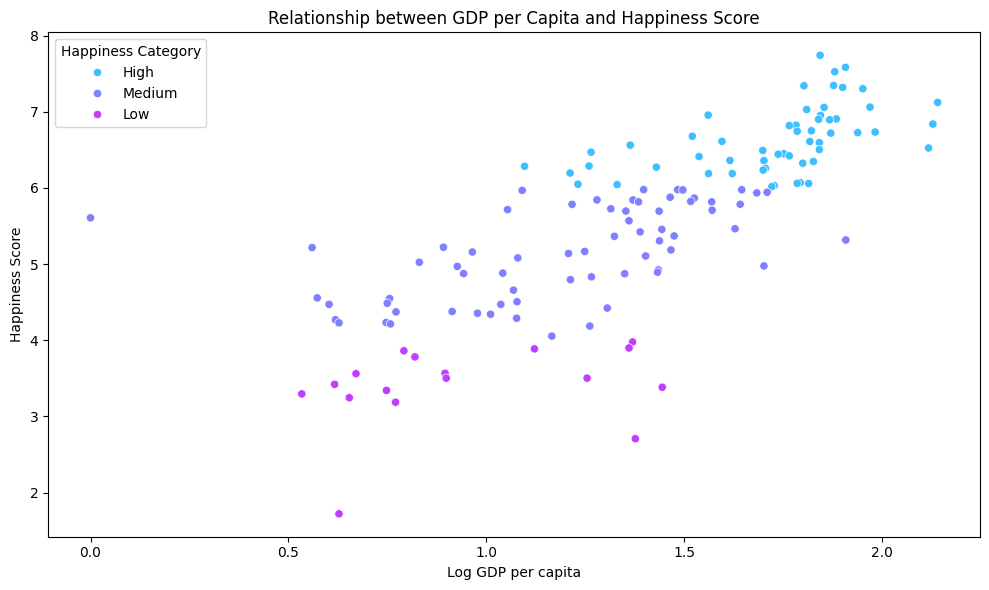

In [33]:
# Bar Plot: Plot Top 10 happiest countries by Score using a bar chart.
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest)
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Line Plot: Plot Top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='brown')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='cool')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category', loc='upper left')
plt.tight_layout()
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------------
**3.2 Problem - 2 - Some Advance Data Exploration Task:**
**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries =

  ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [34]:
# 1. Define the countries in South Asia with a list for example:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# 3. Save the filtered dataframe as separate CSV files for future use.
south_asia_df.to_csv('/content/drive/MyDrive/Assignment1_Dataset/south_asia_happiness_data.csv', index=False)
print(south_asia_df.head(6))

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

**Task - 2 - Composite Score Ranking:**

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

Ranking the South Asian countries based on the Composite Score in descending order. 
  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238


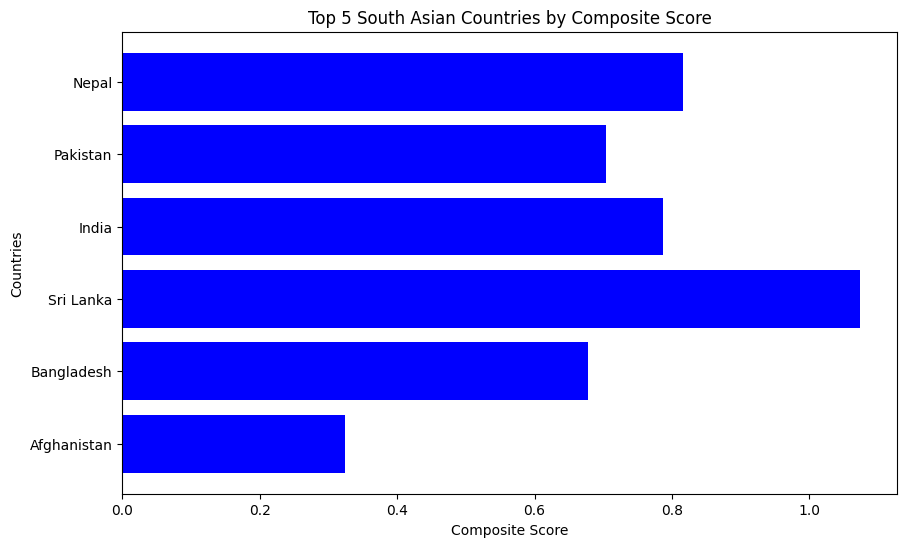

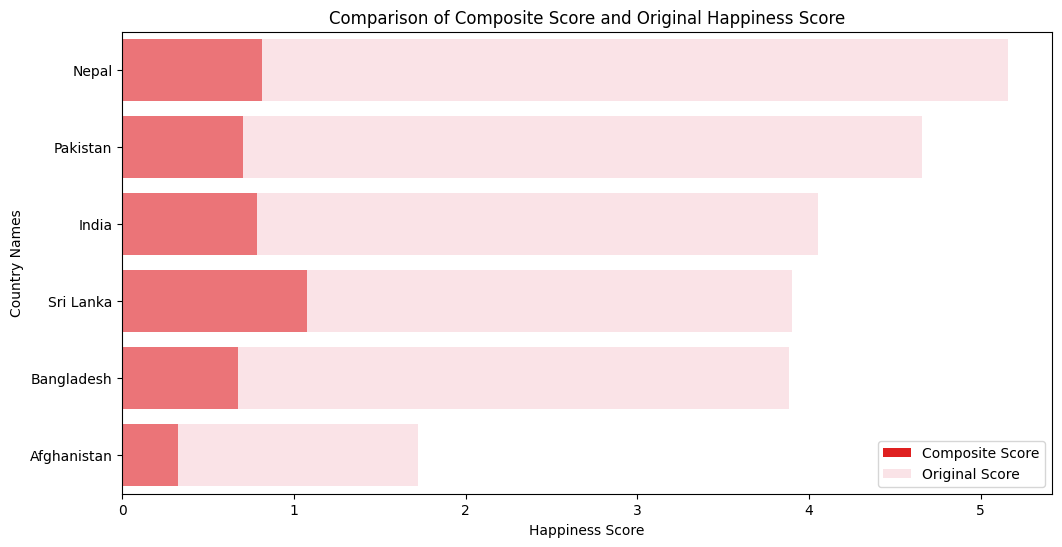

In [35]:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
df2 = pd.read_csv('/content/drive/MyDrive/Assignment1_Dataset/south_asia_happiness_data.csv')
df2['Composite Score'] = (0.40 * df2['Log GDP per capita'] +
                          0.30 * df2['Social support'] +
                          0.30 * df2['Healthy life expectancy'])

# 2. Rank the South Asian countries based on the Composite Score in descending order.
descending_south_asian_data = df2.sort_values('Composite Score', ascending=False)
print("Ranking the South Asian countries based on the Composite Score in descending order. ")
print(descending_south_asian_data[['Country name','Composite Score']])

# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top5_composite = df2.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top5_composite['Country name'], top5_composite['Composite Score'], color='blue')
plt.xlabel("Composite Score")
plt.ylabel("Countries")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.show()

# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.
df2_sorted = df2[['Country name', 'score', 'Composite Score']].head(10)

# Plotting comparison of the Composite Score vs Original Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Composite Score', y='Country name', data=df2_sorted, color='red', label='Composite Score')
sns.barplot(x='score', y='Country name', data=df2_sorted, color='pink', alpha=0.5, label='Original Score')

plt.title("Comparison of Composite Score and Original Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country Names")
plt.legend()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

 • This means that there is high degree of similarity between the rankings obtained from the basic Happiness Score and the Composite Score. However, regardless of which score is used, the nations positions does not change.

**Task - 3 - Outlier Detection:**
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [36]:
# based on score
Q1_score = df2['score'].quantile(0.25)
Q3_score = df2['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
print("Outlier country based on Happiness score is ")
IQR_score

Outlier country based on Happiness score is 


0.6172499999999994

In [37]:
# Calculate the IQR for GDP per Capita
Q1_gdp = df2['Log GDP per capita'].quantile(0.25)
Q3_gdp = df2['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
print("Outlier country based on GDP Per Capita is ")
IQR_gdp

Outlier country based on GDP Per Capita is 


0.16400000000000003

2. Define outliers using the 1.5 × IQR rule.

In [38]:
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers based on Score and GDP per Capita
outliers = df2[
    (df2['score'] < lower_bound_score) |
    (df2['score'] > upper_bound_score) |
    (df2['Log GDP per capita'] < lower_bound_gdp) |
    (df2['Log GDP per capita'] > upper_bound_gdp)
]
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

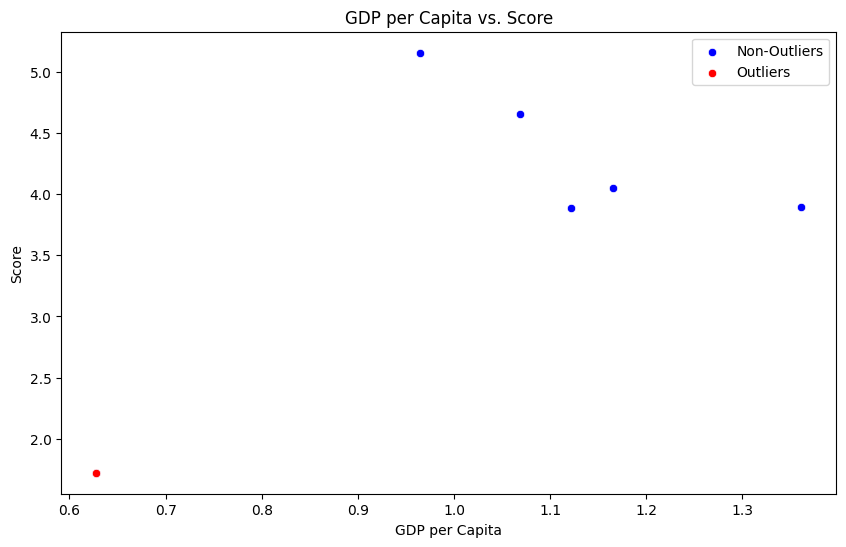

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df2, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('GDP per Capita vs. Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

In [40]:
outlier_countries = outliers[['Country name', 'score', 'Log GDP per capita']]
print("Outlier Countries Based on Score and GDP per Capita:")
print(outlier_countries)

Outlier Countries Based on Score and GDP per Capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

 • The South Asian country differs from other countries in this region and has much lower GDP per capita and score values. It has a low HDI that stands for a poor general development or well-being of a country, and it is likely to be so because of the mentioned economic troubles of the country and its low GDP per capita. The high standard deviation for South Asia shrinks the average and indicates one country that could offset the region’s development. By leaving out the particular country, average GDP per capita and the score would improve, giving a truer picture of the region’s state uncontaminated by any extremes.

**Task - 4 - Exploring Trends Across Metrics:**

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.

the correlation between Freedom to Make Life Choices with the Score is : 0.8005185224163315
the correlation between Generosity with the Score is : 0.874512371253192


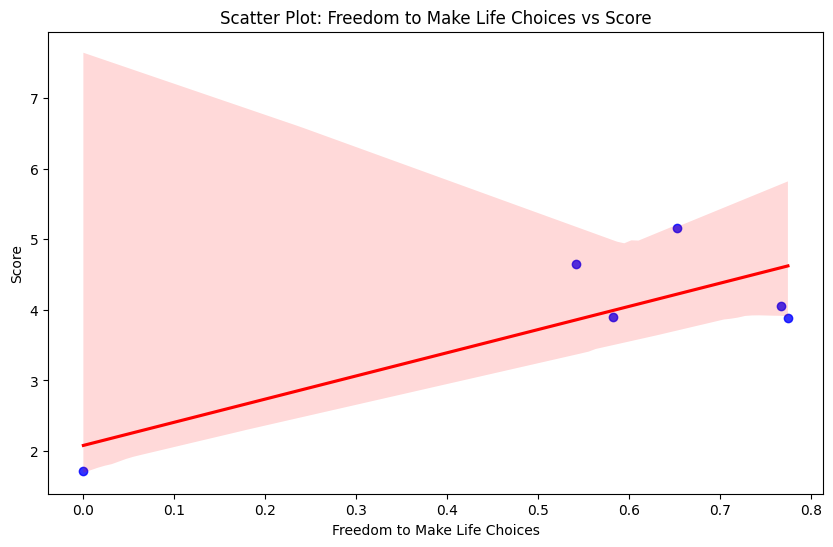

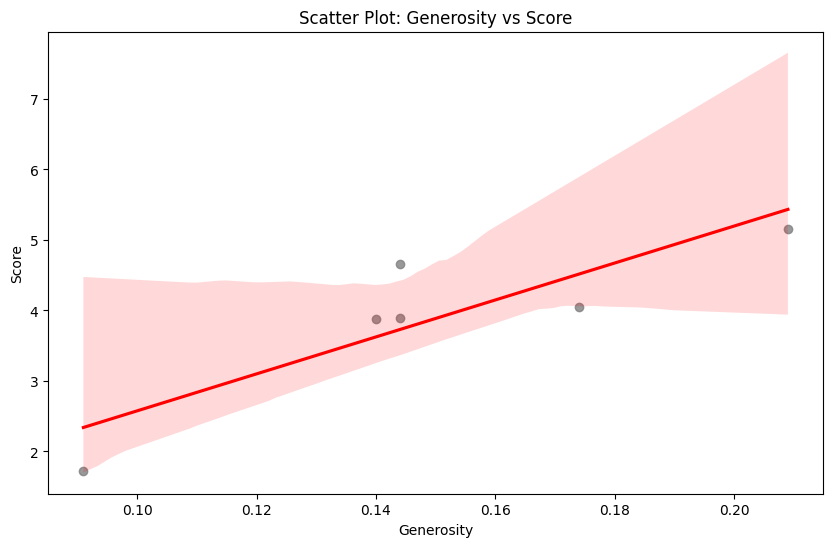

In [41]:
#1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
freedom_correlation = df2['Freedom to make life choices'].corr(df2['score'])
generosity_correlation = df2['Generosity'].corr(df2['score'])
print(f"the correlation between Freedom to Make Life Choices with the Score is : {freedom_correlation}")
print(f"the correlation between Generosity with the Score is : {generosity_correlation}")
#2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=df2, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=df2, scatter_kws={'color':'grey'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

 • Based on the calculations, the Generosity produces a higher Pearson correlation coefficient of 0.87 with the Score than Freedom to Make Life Choices with the correlation of 0.80. In the South Asian countries, the Generosity and Freedom to Make Life Choices tend to be high that reflect the higher score from the measurement. However, the stronger correlation with Generosity implies that there exists a stronger or direct associate between this metric and the Score. The scatter plots support this conclusion, the Generosity scatter plot has a steeper slope than the Freedom to Make Life Choices.

**Task - 5 - Gap Analysis:**

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

Ranking the South Asian countries by this gap in descending order.

  Country name  GDP-Score gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193
Ranking the South Asian countries by this gap in ascending order. 

  Country name  GDP-Score gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
4   Bangladesh         -2.764
3    Sri Lanka         -2.537
5  Afghanistan         -1.093


<ipython-input-42-273c57d7f9a0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score gap', y='Country name', data=top_3, palette='cool')


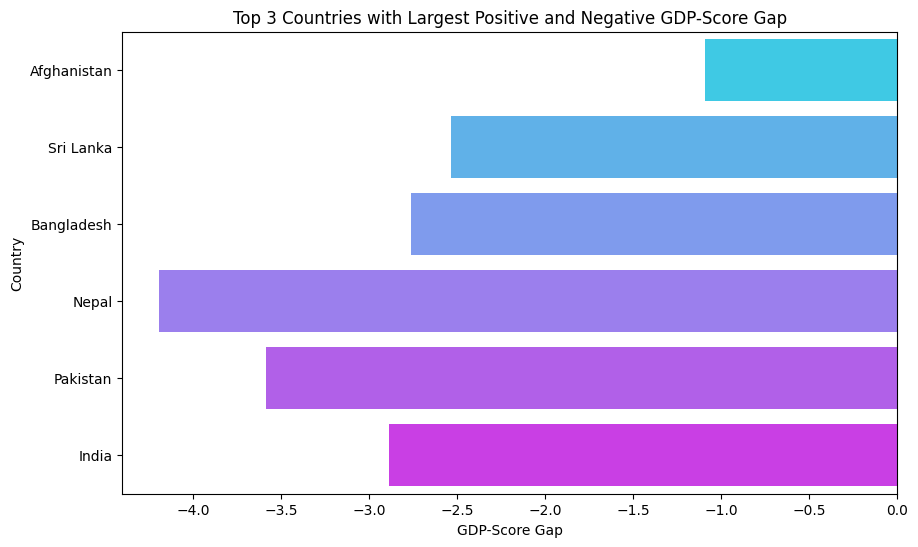

In [42]:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
#for each South Asian country.
df2['GDP-Score gap']=df2['Log GDP per capita']-df2['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
descending_order=df2[['Country name', 'GDP-Score gap']].sort_values(by='GDP-Score gap', ascending=False)
print("Ranking the South Asian countries by this gap in descending order.\n")
print(descending_order.head(6))
aescending_order=df2[['Country name', 'GDP-Score gap']].sort_values(by='GDP-Score gap', ascending=True)
print("Ranking the South Asian countries by this gap in ascending order. \n")
print(aescending_order.head(6))
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_postive=df2.nlargest(3,'GDP-Score gap')
top_3_negative=df2.nsmallest(3,'GDP-Score gap')
top_3=pd.concat([top_3_postive,top_3_negative])
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score gap', y='Country name', data=top_3, palette='cool')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

 • The GDP-Score gap reveals key insights into the economic and development disparities among South Asian countries. For instance, countries with the largest negative gaps like Nepal (-4.193), Pakistan (-3.588), and India (-2.888) indicate lower economic output relative to their score, possibly due to issues like political instability, poverty, or underdeveloped infrastructure despite significant population sizes or human capital. Conversely, smaller negative gaps in Afghanistan (-1.093) or Sri Lanka (-2.537) suggest slightly better alignment between GDP and score, which might stem from relatively more effective governance, remittance inflows, or strategic investments. The implications of these gaps are significant—narrowing them would require boosting GDP per capita through economic reforms, improved education, technological advancements, and poverty alleviation policies while enhancing sustainability. Addressing these gaps is crucial for South Asia to achieve equitable growth and better living standards.

----------------------------------------------------------------------------------------------------------------------------------------------------------------
**3.3 Problem - 3 - Comparative Analysis:**

**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**
**Tasks:**
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [43]:
#1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
#following list:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_data = df[df['Country name'].isin(middle_east_countries)]
middle_east_data.to_csv('/content/drive/MyDrive/Assignment1_Dataset/middle_east.csv',index=False)
df3=pd.read_csv('/content/drive/MyDrive/Assignment1_Dataset/middle_east.csv')
print(df3.head())

           Country name  score  Log GDP per capita  Social support  \
0                Israel  7.341               1.803           1.513   
1                Kuwait  6.951               1.845           1.364   
2  United Arab Emirates  6.733               1.983           1.164   
3          Saudi Arabia  6.594               1.842           1.361   
4               Bahrain  5.959                 NaN             NaN   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.740                         0.641       0.153   
1                    0.661                         0.827       0.200   
2                    0.563                         0.815       0.209   
3                    0.511                         0.787       0.114   
4                      NaN                           NaN         NaN   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.193                2.298               High  
1   

**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [44]:
#1 Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
south_asia_mean=df2['score'].mean()
south_asia_standard_deviation=df2['score'].std()
print(f"In south asia, the mean of the score is {south_asia_mean} and the standarad deviation is {south_asia_standard_deviation} ")
middle_east_mean=df3['score'].mean()
middle_east_standard_deviation=df3['score'].std()
print(f"In middle east, the mean of the score is {middle_east_mean} and the standarad deviation is {middle_east_standard_deviation} ")
# • Which region has higher happiness Scores on average?
if(south_asia_mean>middle_east_mean):
  print("The south asia have higher happiness Scores on average. ")
else:
  print("The middle east have higher happiness Scores on average.")

In south asia, the mean of the score is 3.895666666666667 and the standarad deviation is 1.1770690152521504 
In middle east, the mean of the score is 5.412100000000001 and the standarad deviation is 1.5662011684327144 
The middle east have higher happiness Scores on average.


**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

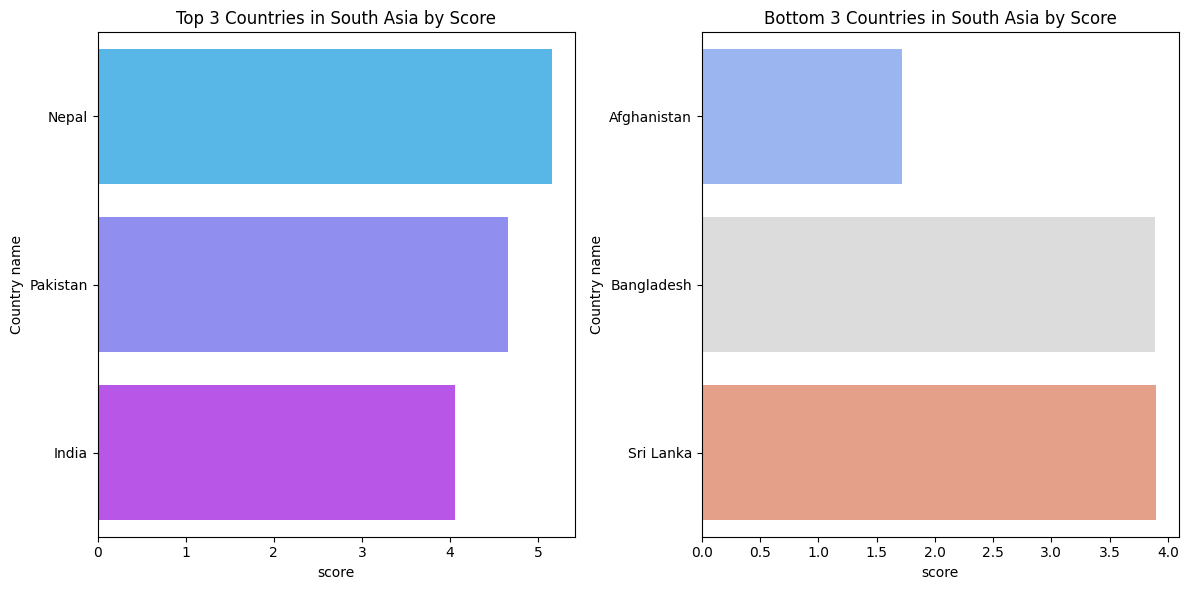

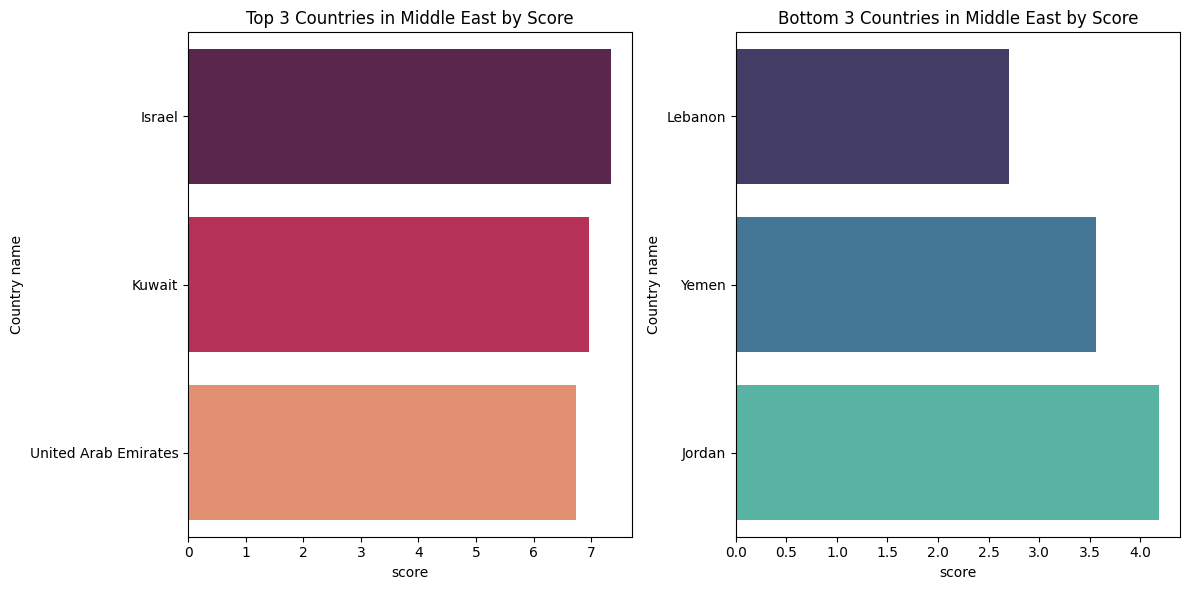

In [45]:
#2. Top and Bottom Performers:
#• Identify the top 3 and bottom 3 countries in each region based on the score.

top_3_southAsia=df2[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
bottom_3_southAsia=df2[['Country name', 'score']].sort_values(by='score').head(3)
top_3_middleEast=df3[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
bottom_3_middleEast=df3[['Country name', 'score']].sort_values(by='score').head(3)

#• Plot bar charts comparing these charts.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=top_3_southAsia, hue='Country name', palette='cool', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=bottom_3_southAsia, hue='Country name', palette='coolwarm', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=top_3_middleEast, hue='Country name', palette='rocket', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=bottom_3_middleEast, hue='Country name', palette='mako', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

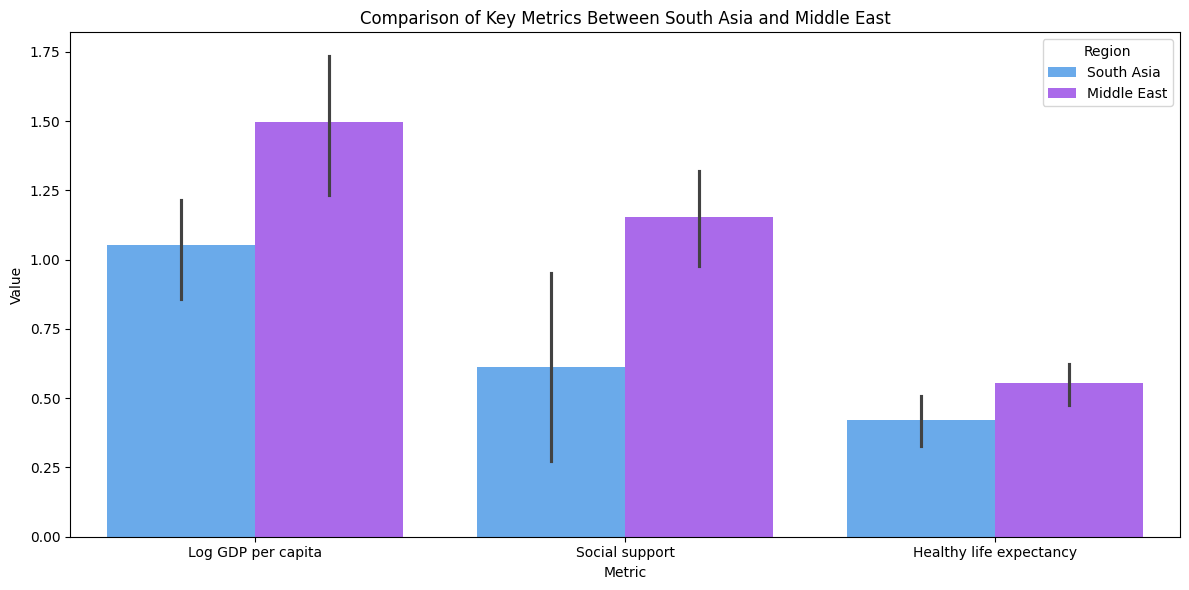

the Social Support show the largest disparity between two region.


In [46]:
#3. Metric Comparisons:
#• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
#between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

metrics_south_asia = df2[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
metrics_middle_east = df3[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

metrics_south_asia['Region'] = 'South Asia'
metrics_middle_east['Region'] = 'Middle East'

comparison_df = pd.concat([metrics_south_asia, metrics_middle_east]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='cool')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

#• Which metrics show the largest disparity between the two regions?
print("the Social Support show the largest disparity between two region.")

**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [47]:
#4. Happiness Disparity:
#• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
range_south_asia=df2['score'].max()-df2['score'].min()
range_middle_east=df3['score'].max()-df3['score'].min()
print(f"the range (max - min) of south asia is {range_south_asia}")
print(f"the range (max - min) of middle east is {range_middle_east}")


cv_south_asia=df2['score'].std()/df2['score'].mean()
print(f"the CV of south asia is {cv_south_asia}. ")

cv_south_middle_east=df3['score'].std()/df3['score'].mean()
print(f"the CV of middle east is {cv_south_middle_east}. ")

#• Which region has greater variability in happiness?
if cv_south_asia > cv_south_middle_east:
    print("South Asia has greater relative variability in happiness based on the CV.")
else:
    print("The Middle East has greater relative variability in happiness based on the CV.")

the range (max - min) of south asia is 3.4370000000000003
the range (max - min) of middle east is 4.634
the CV of south asia is 0.3021482883337427. 
the CV of middle east is 0.28938880812119405. 
South Asia has greater relative variability in happiness based on the CV.


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

THE correlation between Freedom to Make Life Choices and Generosity with the Score in south aisa : 
score                           1.000000
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64
THE correlation between Freedom to Make Life Choices and Generosity with the Score in the middle east : 
score                           1.000000
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


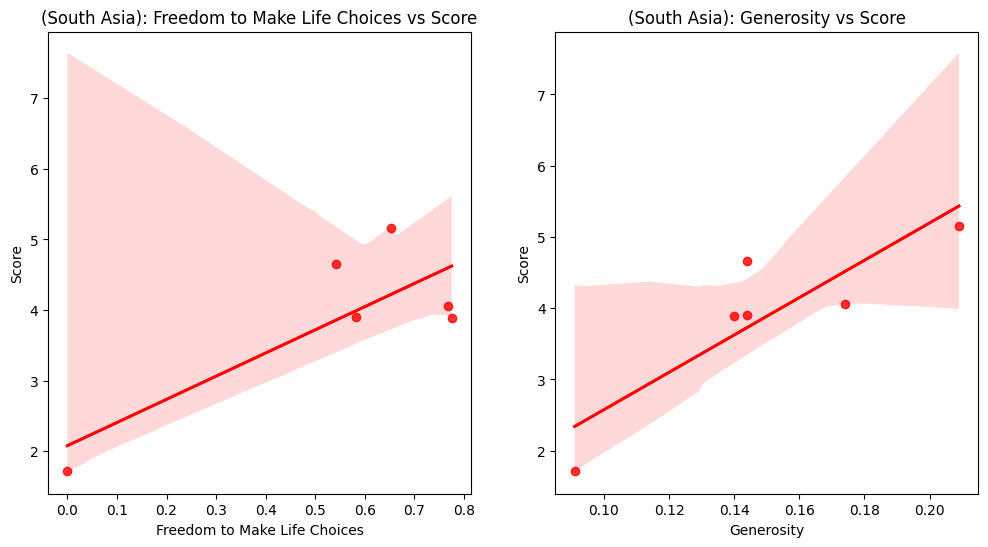

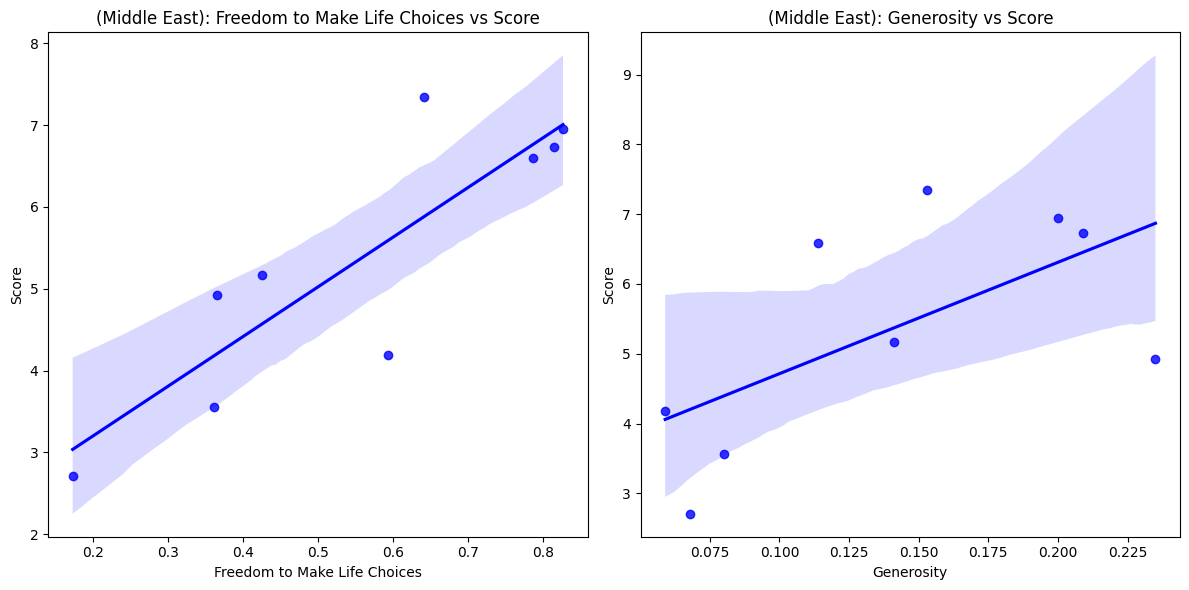

In [48]:
# 5. Correlation Analysis:
#• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
#Generosity within each region.

correlation_south_asia=df2[['score', 'Freedom to make life choices', 'Generosity']].corr()['score']
print("THE correlation between Freedom to Make Life Choices and Generosity with the Score in south aisa : ")
print(correlation_south_asia)

correlation_middle_east=df3[['score', 'Freedom to make life choices', 'Generosity']].corr()['score']
print("THE correlation between Freedom to Make Life Choices and Generosity with the Score in the middle east : ")
print(correlation_middle_east)

#• Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=df2, color='red', ci=95)
plt.title('(South Asia): Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=df2, color='red', ci=95)
plt.title('(South Asia): Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=df3, color='blue', ci=95)
plt.title('(Middle East): Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=df3, color='blue', ci=95)
plt.title('(Middle East): Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()



Discussion of Outlier Findings:

In South Asia, outliers in Score reveal a country with notably lower well-being, potentially due to economic instability or sociopolitical challenges. Similarly, outliers in GDP per Capita indicate significant disparities in economic development, with certain countries experiencing far lower income levels than the regional average. These findings highlight the need for targeted interventions to address inequality and improve economic opportunities.

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

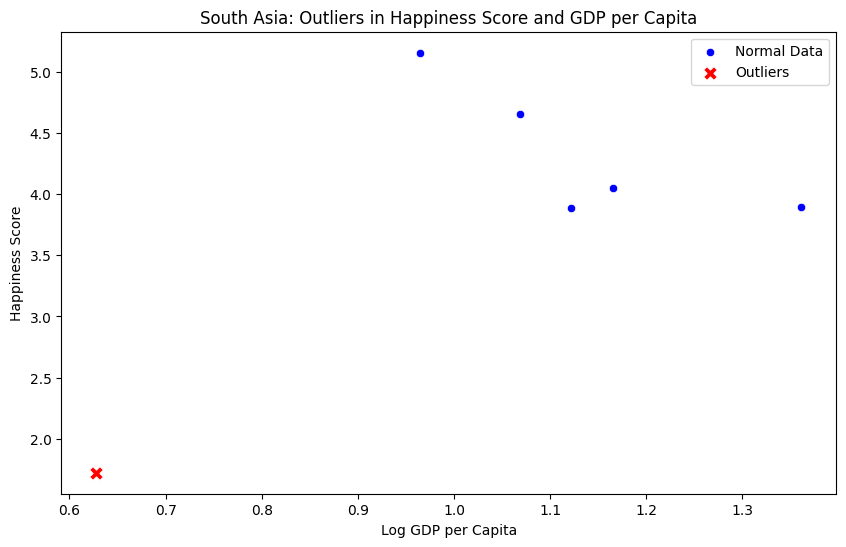

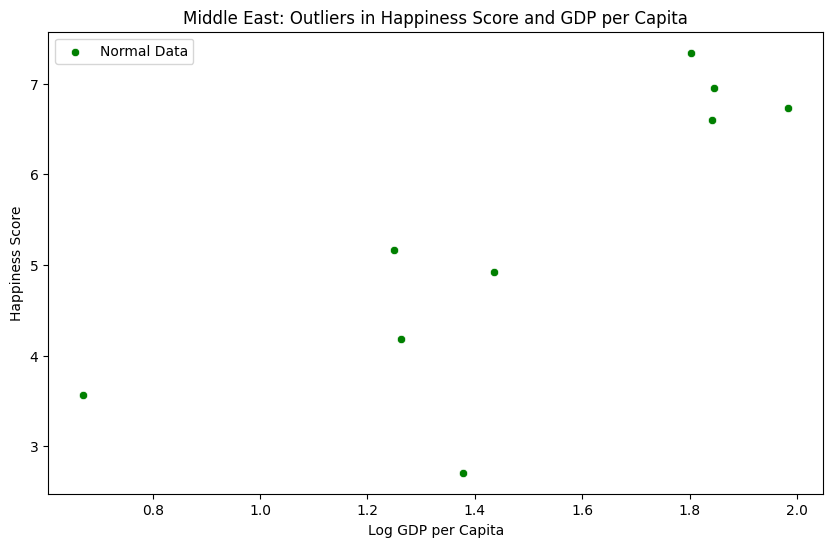

South Asia Outliers:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [49]:
#6. Outlier Detection:
#• Identify outlier countries in both regions based on Score and GDP per Capita.
# Define a function to detect outliers using the 1.5 × IQR rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 1. Identify outliers in South Asia and Middle East for Score and GDP per Capita
outliers_sa_score = detect_outliers(df2, 'score')
outliers_sa_gdp = detect_outliers(df2, 'Log GDP per capita')

outliers_me_score = detect_outliers(middle_east_data, 'score')
outliers_me_gdp = detect_outliers(middle_east_data, 'Log GDP per capita')

# Combine all outliers for South Asia and Middle East
outliers_south_asia = pd.concat([outliers_sa_score, outliers_sa_gdp]).drop_duplicates()
outliers_middle_east = pd.concat([outliers_me_score, outliers_me_gdp]).drop_duplicates()

# 2. Plot the outliers for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df2, label='Normal Data', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia, label='Outliers', color='red', marker='X', s=100)
plt.title("South Asia: Outliers in Happiness Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

# 3. Plot the outliers for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Normal Data', color='green')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east, label='Outliers', color='red', marker='X', s=100)
plt.title("Middle East: Outliers in Happiness Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

# 4. Print outliers
print("South Asia Outliers:")
print(outliers_south_asia[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print(outliers_middle_east[['Country name', 'score', 'Log GDP per capita']])




**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-50-15b9ed6f7c81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(palette='cool',x='Region', y='score', data=pd.concat([df2.assign(Region='South Asia'), df3.assign(Region='Middle East')]))


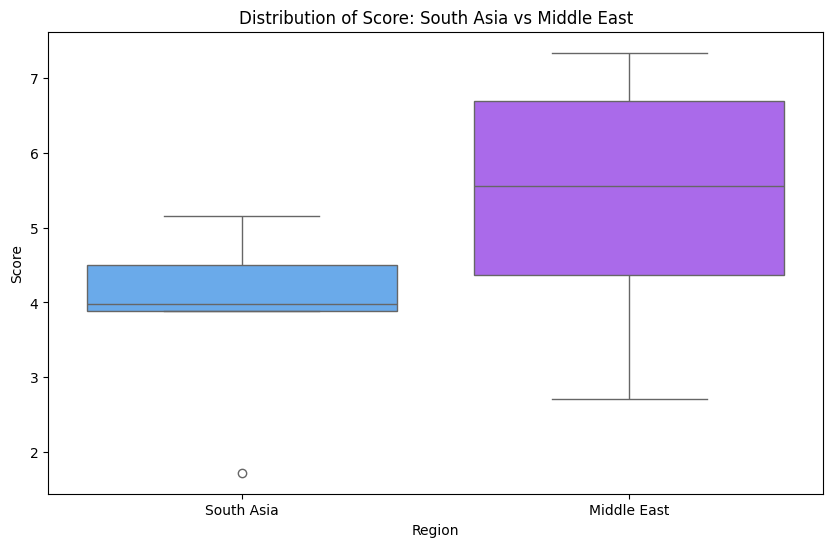

In [50]:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10, 6))
sns.boxplot(palette='cool',x='Region', y='score', data=pd.concat([df2.assign(Region='South Asia'), df3.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()